In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [4]:
bank=pd.read_csv("bank-full.csv",sep=";")

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
# One hot encoding of Categorical Variables

bank1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])

In [11]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [12]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [14]:
# Custom binary encoding of Binary Output Variables

bank1['default']=np.where(bank1['default'].str.contains("yes"),1,0)
bank1['housing']=np.where(bank1['housing'].str.contains("yes"),1,0)
bank1['loan']=np.where(bank1['loan'].str.contains("yes"),1,0)
bank1['y']=np.where(bank1['y'].str.contains("yes"),1,0)

In [15]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [16]:
# Find and replace encoding for month categorical variable

bank1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [18]:
bank1=bank1.replace(order)

In [19]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [20]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

In [24]:
bank1.columns.value_counts().sum() # There are 38 columns.

38

In [25]:
# Model Building

x=pd.concat([bank1.iloc[:,0:11],bank1.iloc[:,12:]],axis=1)
y=bank1.iloc[:,11]

In [29]:
# Regression Model

classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [30]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
y_pred_df=pd.DataFrame({'Actual y':y,'Predicted y':y_pred})

In [32]:
y_pred_df

,Actual y,Predicted y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [33]:
cm=confusion_matrix(y,y_pred)

In [34]:
cm

array([[39032,   890],
       [ 3983,  1306]])

In [40]:
# Accuracy

TP=39032
TN=1306
FP=890
FN=3983

accuracy=(TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.8922164959854902


In [41]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.59      0.25      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.65     45211
weighted avg       0.87      0.89      0.87     45211



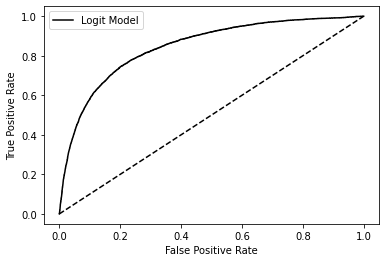

In [44]:
# ROC Curve

fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr,tpr,'k',label='Logit Model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=2)
plt.show()

In [48]:
auc=roc_auc_score(y,y_pred)
print(auc) # Area Under Curve.

0.6123170566419985
